# <center>Assignment</center>
<center>
        Shan-Hung Wu & DataLab
        <br>
        Fall 2021
</center>

# Assignment
In this assignment, you have to implement the input pipeline of the CNN model and try to write/read tfrecord with the **Oregon Wildlife** dataset.

We provide you with the complete code for the image classification task of the CNN model, but remove the part of the input pipeline. What you need to do is completing this part and train the model for at least 5 epochs.

### Description of Dataset:
1. The raw data is from [kaggle](https://www.kaggle.com/virtualdvid/oregon-wildlife), which consists of 20 class images of wildlife.
2. We have filtered the raw data. You need to download the filtered images from [here](https://drive.google.com/open?id=1HIm8pgiVZKztnMcwmSi3RciFKUBEv2ek) and use them to complete the image classification task.
3. In the dataset we prepared for you, there are nearly 7,200 images, which contain 10 kinds of wildlife.

The sample image is shown below:

<center><img style='width: 50%, height=50%' height="350" width="350" src='./imgsrc/red_fox.png' /></center>

### Requirement:

+ write the training/testing datasets to tfrecord files.
+ read data from tfrecord files and preprocess them.
+ After finishing the input pipeline part mentioned above, you have to train the model for at least 5 epochs.

### Notification:
+ Submit to iLMS with your ipynb (Lab12_{student_id}.ipynb)
+ The deadline will be **2021/11/11 23:59**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import IPython.display as display
import matplotlib.pyplot as plt
import pathlib
import random
import os

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.experimental.set_visible_devices(gpus[2], 'GPU')
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

4 Physical GPUs, 1 Logical GPUs


In [ ]:
# You need to download the prepared data and unzip the file in current path('./')
data_root = pathlib.Path('./oregon_wildlife')

# print the subfolders.
print('classes:')
for item in data_root.iterdir():
    print(item)
    
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
all_image_paths = shuffle(all_image_paths, random_state=1)
all_image_paths = [path for path in all_image_paths if path[-3:] not in ('gif','bmp')]
image_count = len(all_image_paths)
print('\ntotal img num:', image_count)

classes:
oregon_wildlife/bald_eagle
oregon_wildlife/black_bear
oregon_wildlife/cougar
oregon_wildlife/deer
oregon_wildlife/nutria
oregon_wildlife/raccoon
oregon_wildlife/raven
oregon_wildlife/red_fox
oregon_wildlife/sea_lions
oregon_wildlife/virginia_opossum

total img num: 7168


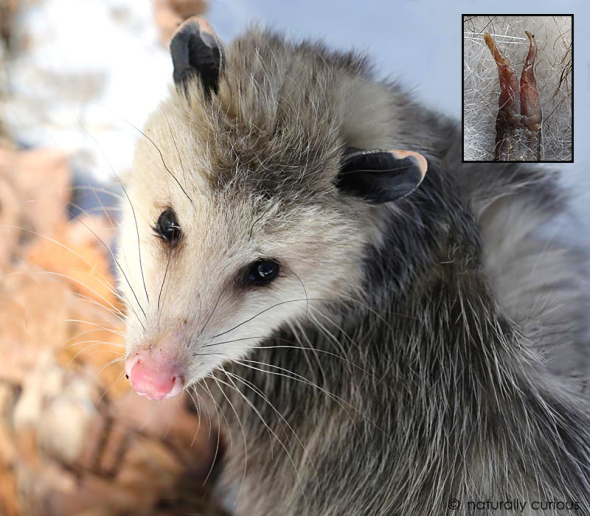

virginia_opossum


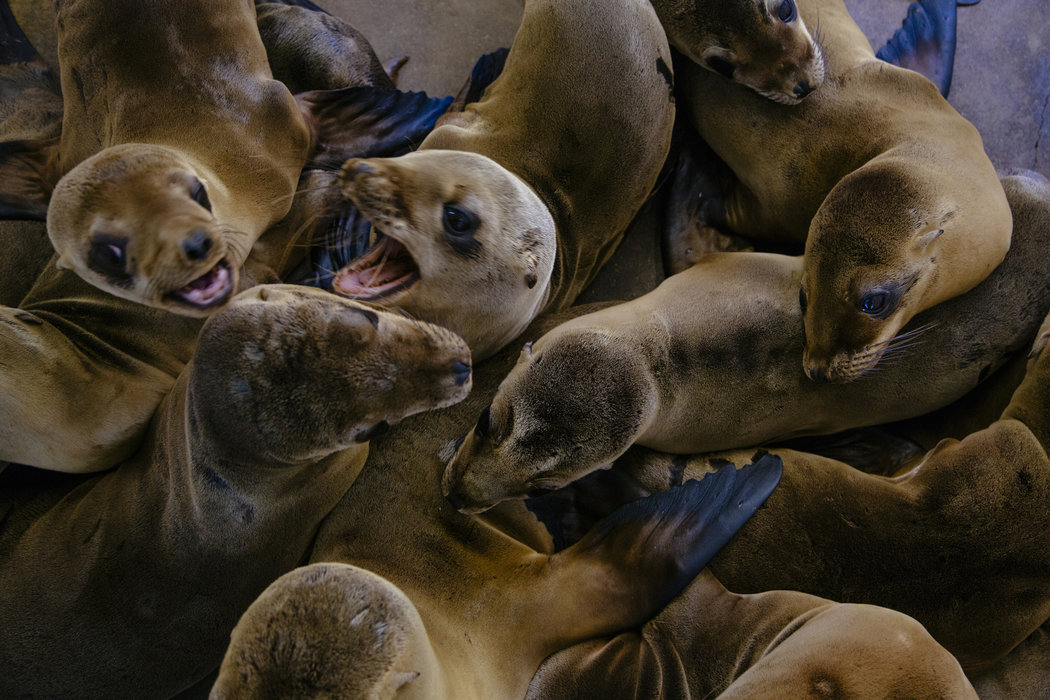

sea_lions


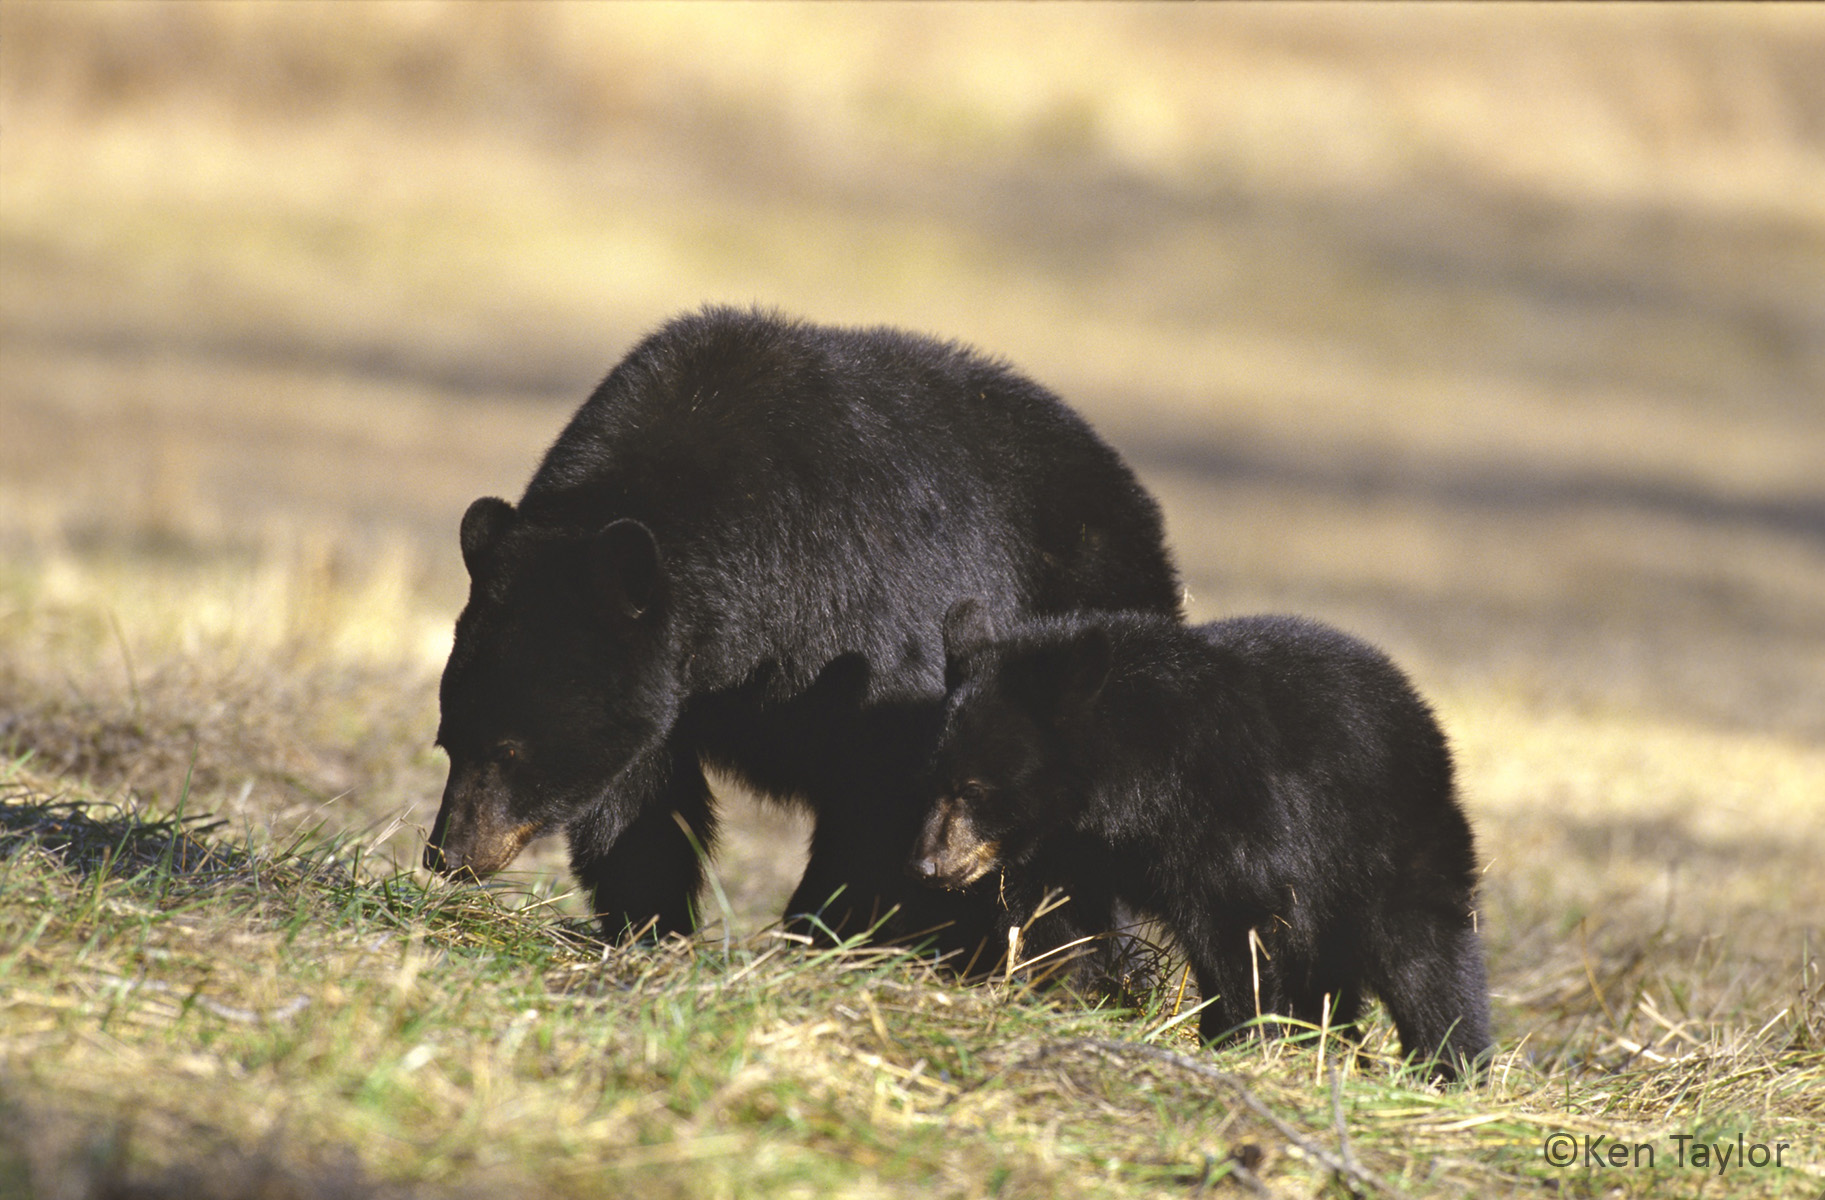

black_bear


In [ ]:
# random showing 3 iamges for you
for n in range(3):
    image_path = random.choice(all_image_paths)
    display.display(display.Image(image_path, width=200, height=200))
    print(image_path.split('/')[-2])

In [ ]:
# get the labels
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
# total labels
n_classes = len(label_names)
print(label_names)

['bald_eagle', 'black_bear', 'cougar', 'deer', 'nutria', 'raccoon', 'raven', 'red_fox', 'sea_lions', 'virginia_opossum']


In [ ]:
# get the mapping dic
label_to_index = dict((name, index) for index,name in enumerate(label_names))
index_to_label = dict((index, name) for index,name in enumerate(label_names))
print(label_to_index)

{'bald_eagle': 0, 'black_bear': 1, 'cougar': 2, 'deer': 3, 'nutria': 4, 'raccoon': 5, 'raven': 6, 'red_fox': 7, 'sea_lions': 8, 'virginia_opossum': 9}


In [ ]:
# get the label data
all_image_labels = [label_to_index[pathlib.Path(path).parent.name] for path in all_image_paths]
print("First 10 labels indices: ", all_image_labels[:10])

First 10 labels indices:  [8, 5, 2, 5, 0, 2, 1, 0, 1, 0]


In [ ]:
# Create training and validation sets using an 80-20 split
img_path_train, img_path_val, label_train, label_val = train_test_split(all_image_paths,
                                all_image_labels,test_size=0.2,random_state=0)
print('training data: %d'%(len(img_path_train)))
print('testing data: %d'%(len(img_path_val)))

training data: 5734
testing data: 1434


In [ ]:
# You will use these setting in your code, pls do not modify these 4.
IMAGE_SIZE_CROPPED = 224
IMAGE_HEIGHT = 300
IMAGE_WIDTH = 300
IMAGE_DEPTH = 3


# feel free to modify these Settings.
BUFFER_SIZE = 10000
BATCH_SIZE = 32

In [ ]:
# loda images
def load_image(image_path, label):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=IMAGE_DEPTH)
    img = tf.image.resize(img, (IMAGE_HEIGHT, IMAGE_WIDTH))
    img = tf.cast(img, tf.float32)
    img = tf.divide(img,255.0)
    return img, label

In [ ]:
# the dataset objects we prepared for you
dataset_train = tf.data.Dataset.from_tensor_slices((img_path_train,label_train))
dataset_train = dataset_train.map(load_image)

dataset_val = tf.data.Dataset.from_tensor_slices((img_path_val,label_val))
dataset_val = dataset_val.map(load_image)

In [ ]:
# Use tf.data API to:
    # todo1:
        # write the dataset above to tfrecord
    # todo2:
        # read the data from tfrecord you get in Todo1
    # todo3:
        # remember to preprocess the data. You can refer to the code in the Cifar10 section.

In [ ]:
# dataset_train = dataset_train.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


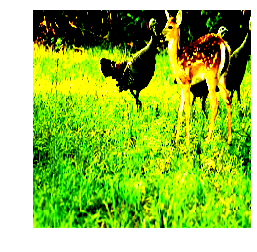

deer


In [ ]:
for img, label in dataset_train.take(1):
    plt.imshow(img[0]) 
    plt.axis('off') 
    plt.show()
    print(index_to_label[label[0].numpy()])

In [ ]:
base_model = VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3),
    pooling=None,
)
for layer in base_model.layers:
    layer.trainable = False

top_model = models.Sequential()
top_model.add(layers.Flatten())
top_model.add(layers.Dense(4096, activation='relu'))
top_model.add(layers.Dropout(0.5))
top_model.add(layers.Dense(1024, activation='relu'))
top_model.add(layers.Dropout(0.5))
top_model.add(layers.Dense(n_classes, activation='softmax'))

wild_model = tf.keras.Model(inputs=base_model.input, outputs=top_model(base_model.output)) 

In [ ]:
wild_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

wild_model.fit(dataset_train, validation_data=dataset_val, epochs=5)

Epoch 1/5
180/180 [==============================] - 30s 169ms/step - loss: 2.6112 - accuracy: 0.5774 - val_loss: 0.4218 - val_accuracy: 0.8633
Epoch 2/5
180/180 [==============================] - 29s 160ms/step - loss: 0.6934 - accuracy: 0.7740 - val_loss: 0.2980 - val_accuracy: 0.9045
Epoch 3/5
180/180 [==============================] - 29s 159ms/step - loss: 0.6217 - accuracy: 0.8071 - val_loss: 0.3093 - val_accuracy: 0.9010
Epoch 4/5
180/180 [==============================] - 29s 161ms/step - loss: 0.5034 - accuracy: 0.8390 - val_loss: 0.2613 - val_accuracy: 0.9184
Epoch 5/5
180/180 [==============================] - 31s 173ms/step - loss: 0.4715 - accuracy: 0.8525 - val_loss: 0.2088 - val_accuracy: 0.9310


In [ ]:
def to_list(img, label):
    img = tf.reshape(img,[-1])
    return img, label

In [ ]:
dataset_train = dataset_train.map(to_list)
dataset_val = dataset_val.map(to_list)

In [ ]:
# The following functions can be used to convert a value to a type compatible with tf.Example.
def _bytes_feature(value):
  """Returns a bytes_list from a string / byte."""
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  """Returns a float_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=value))

def _int64_feature(value):
  """Returns an int64_list from a bool / enum / int / uint."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

In [ ]:
def serialize_example_pyfunction(img,label):
    """
    Creates a tf.Example message ready to be written to a file.
    """
    # Create a dictionary mapping the feature name to the tf.Example-compatible data type.
    feature = {
        'img': _float_feature(img.numpy()),
        'label': _int64_feature(label.numpy()),
    }
    # Create a Features message using tf.train.Example.
    example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
    return example_proto.SerializeToString()

In [ ]:
def tf_serialize_example(img,label):
    tf_string = tf.py_function(
        serialize_example_pyfunction,
        (img,label),  # pass these args to the above function.
        tf.string)      # the return type is `tf.string`.
    return tf.reshape(tf_string, ()) # The result is a scalar

In [ ]:
dataset_train = dataset_train.map(tf_serialize_example)
dataset_val = dataset_val.map(tf_serialize_example)

In [ ]:
%%time
train_filename = 'train_wild.tfrecord'
train_writer = tf.data.experimental.TFRecordWriter(train_filename)
train_writer.write(dataset_train)

CPU times: user 8min 8s, sys: 7.47 s, total: 8min 15s
Wall time: 8min 8s


In [ ]:
%%time
val_filename = 'val_wild.tfrecord'
val_writer = tf.data.experimental.TFRecordWriter(val_filename)
val_writer.write(dataset_val)

CPU times: user 2min 1s, sys: 2.01 s, total: 2min 3s
Wall time: 2min 2s


In [ ]:
train_filenames = [train_filename]
train_raw_dataset = tf.data.TFRecordDataset(train_filenames)

val_filenames = [val_filename]
val_raw_dataset = tf.data.TFRecordDataset(val_filenames)

In [ ]:
# Create a description of the features. 
feature_description = {
    'img': tf.io.FixedLenFeature([IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_DEPTH], tf.float32),
    'label': tf.io.FixedLenFeature([], tf.int64, default_value=0),
}

def _parse_function(example_proto):
    # Parse the input tf.Example proto using the dictionary above.
    data = tf.io.parse_single_example(example_proto, feature_description)
    img = data['img']
    label = data['label']
    return img, label

def pre_train_data(img, label):
    distorted_img = tf.image.random_crop(img, [IMAGE_SIZE_CROPPED,IMAGE_SIZE_CROPPED,IMAGE_DEPTH])
    distorted_img = tf.image.random_flip_left_right(distorted_img)
    distorted_img = tf.image.random_brightness(distorted_img, max_delta=63)
    distorted_img = tf.image.random_contrast(distorted_img, lower=0.2, upper=1.8)
    distorted_img = tf.image.per_image_standardization(distorted_img)
    
    return distorted_img, label

def pre_val_data(img, label):
    img = tf.image.resize_with_crop_or_pad(img, IMAGE_SIZE_CROPPED, IMAGE_SIZE_CROPPED)
    img = tf.image.per_image_standardization(img)
    
    return img, label

In [ ]:
dataset_train = train_raw_dataset.map(_parse_function).map(pre_train_data)
dataset_train = dataset_train.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset_train = dataset_train.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

dataset_val = val_raw_dataset.map(_parse_function).map(pre_val_data)
dataset_val = dataset_val.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset_val = dataset_val.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)